#### **Data Science**

# Análise dos Dados do Airbnb - *Buenos Aires*


<center><img alt="BsAs" width="75%" src="Buenos_aires.jpg"></center>

A Airbnb é uma plataforma online que revolucionou a indústria do turismo, oferecendo uma variedade de opções de hospedagem para viajantes em todo o mundo. Fundada em 2008, a empresa conecta viajantes do mundo todo a uma vasta rede de propriedades, desde apartamentos e casas até quartos em residências particulares.
[Airbnb](https://www.airbnb.com.br/) 

Uma das iniciativas da Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, capital da Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise dos Dados

Aqui o objetivo é garantir um entendimento de como estão estruturados os dados:
**Dicionário das variáveis**

* `id` - Número de identificação do imóvel
* `name` - Título do anúncio da propriedade
* `host_id` - Número de identificação do proprietário 
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Coluna sem valores válidos
* `neighbourhood` - Nome do  bairro
* `latitude` - Coordenada de latitude da propriedade
* `longitude` - Coordenada de longitude da propriedade
* `room_type` - Tipo de acomodação oferecida
* `price` - Valor do aluguel por dia
* `minimum_nights` - Menor quantidade de noites para alugar
* `number_of_reviews` - Número de reviews
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews em um mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Número de avaliações recebidas nos últimos 12 meses            
* `license` - Licença do imóvel para ser alugado                         

In [33]:
df = pd.read_csv('listings.csv')

# Obtendo o número de linhas e colunas
num_linhas, num_colunas = df.shape

print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

# Exibindo as primeiras linhas do DataFrame
display(df.head())

Número de linhas: 37035
Número de colunas: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,61788.0,3,41,2024-04-22,0.28,1,338,5,NaN
1,186005,Modern apartment in Downtown Buenos Aires,893209,Victoria,NaN,Retiro,-34.59804,-58.37688,Entire home/apt,63737.0,7,85,2023-10-28,0.56,4,293,8,NaN
2,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,16032.0,7,119,2024-06-12,0.82,7,13,11,NaN
3,188154,At the heart of San Telmo Double,906277,Magdalena,NaN,San Telmo,-34.62063,-58.36967,Private room,22763.0,2,80,2024-03-09,0.53,6,330,7,NaN
4,48535,Elegant apartment in downtown Bs.As,221044,Florencia,NaN,Retiro,-34.59620,-58.37529,Entire home/apt,45526.0,90,0,NaN,NaN,1,364,0,NaN


### ** Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

É possível notar a presença de 18 variáveis e 37035 entradas,sendo dos tipos, inteiro, float e objeto.

In [35]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 37035
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando buscamos um *dataset* queremos um com qualidade, é possível mensurar isso de acordo com a quantidade de valores ausentes. É necessário entender se os valores nulos são significativos comparados ao total de entradas.

* Na coluna `neighbourhood_group` é possível notar que 100% dos valores não foram inseridos
* Na coluna `License` quase 100% são nulos.
* Aproximadamente 20% dos valores das variáveis `reviews_per_month` e `last_review` são nulos
* Com excessão do `host_name` (0,005%) todos os outros dados estão com 100% de preenchimento

In [36]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) 

neighbourhood_group               1.000000
license                           0.988389
reviews_per_month                 0.196436
last_review                       0.196436
price                             0.081814
host_name                         0.000054
name                              0.000000
id                                0.000000
neighbourhood                     0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

In [10]:
# excluindo valores ausentes
df.drop(columns=['neighbourhood_group'], inplace=True)
df.dropna(axis=0, inplace=True)

# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

### **Qual o tipo de distribuição das variáveis?** 

Para termos uma melhor visualização a respeito da distribuição das variáveis, irei plotar um histograma.

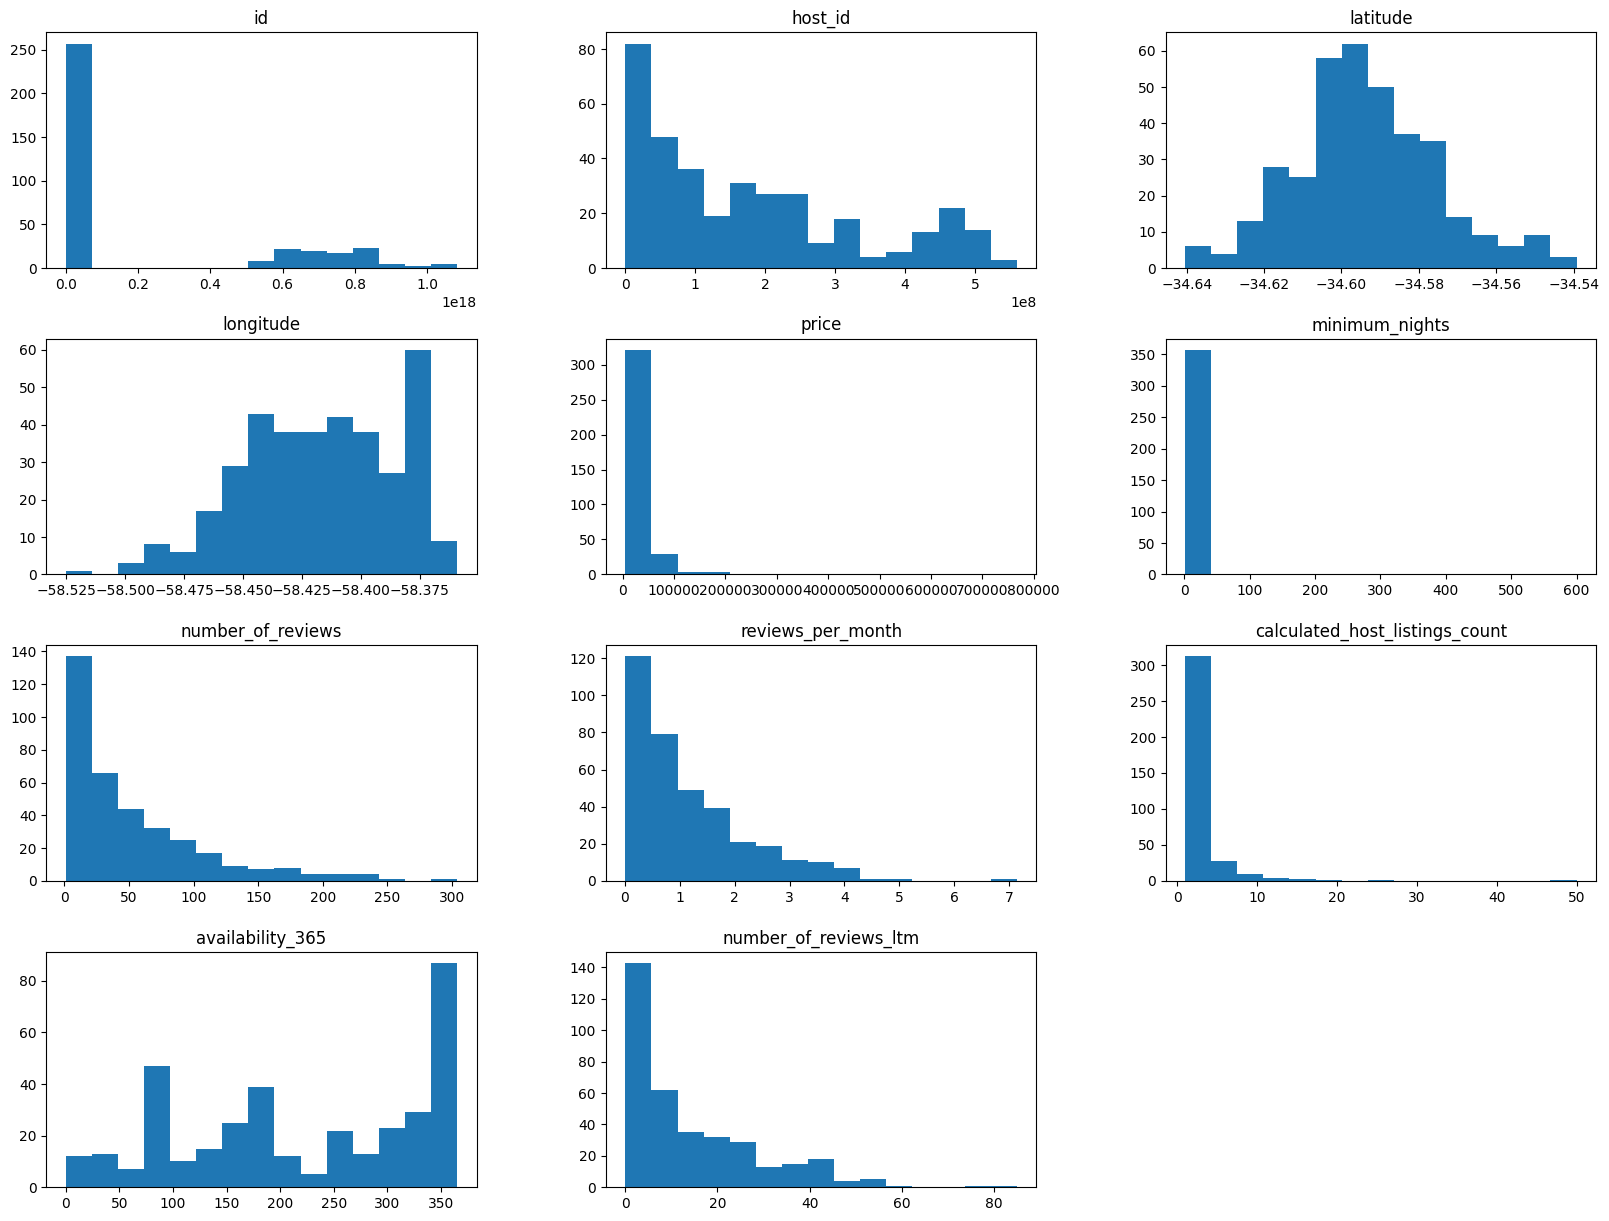

In [11]:
df.hist(bins=15, figsize=(20,15), grid=False);

### ** Existe *Outliers*?**

Se prestarmos atenção na forma em como o histograma está distribuindo os dados, podemos encontrar indicativos da presença de *outliers*. Por exemplo nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem a representação gráfica. Para confirmar, existem duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

In [12]:
#Ver o resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,39259.292479,4.922006,52.222841,1.148189,2.596100,222.147632
std,53277.021186,31.977026,54.372658,1.075222,3.776003,113.926311
min,5000.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,21990.000000,2.000000,13.000000,0.320000,1.000000,127.000000
50%,28226.000000,2.000000,32.000000,0.830000,1.000000,218.000000
75%,41752.000000,3.000000,73.500000,1.590000,3.000000,337.500000
max,767446.000000,600.000000,304.000000,7.140000,50.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 41752, porém seu valor máximo é 767446.
* O valor máximo para a variável (`minimum_nights`) está acima de 365 dias no ano.

#### **Definindo limites para 'minimum_nights'**

In [13]:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nigths: ', sup_minimum_nights)
print('Limite inferios de minimum_nigths: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nigths:  4.5
Limite inferios de minimum_nigths:  0.5


#### **Boxplot para minimum_nights**

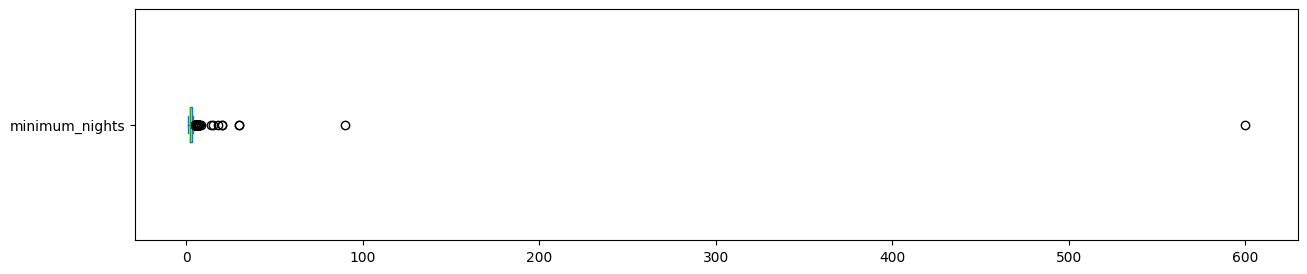

minimum_nights: valores acima de 6:
27 entradas.
7.5209%


In [14]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 6 dias para minimum_nights
print('minimum_nights: valores acima de 6:')
print('{} entradas.'.format(len(df[df.minimum_nights > 6])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Com isso podemos extrair algumas informações:

* Cerca de 27 acomodações tem um minimo acima de 6 noites
* Essas acomodações representam apenas 7.5% do *dataset*

#### **Definindo limites para 'Price'**

In [15]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites 
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  19762.0
Limite superior de price:  71395.0
Limite inferior de price:  -7653.0


#### **Boxplot para price**

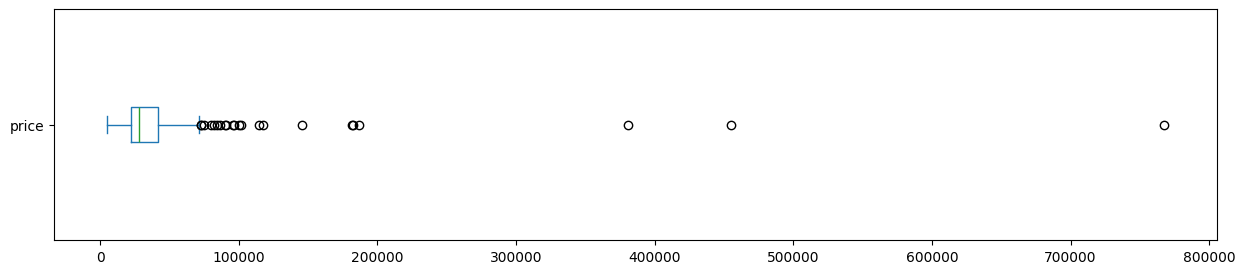


price: valores acima de 71395.0
22 entradas
6.1281%


In [16]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 71395.0 para price
print('\nprice: valores acima de 71395.0')
print('{} entradas'.format(len(df[df.price > 71395.0])))
print('{:.4f}%'.format((len(df[df.price > 71395.0]) / df.shape[0])*100))

Alguns insights tirados dessa análise :

* Existem 22 entradas de acomodações com valores acima de 71395.0
* E essas acomodações representam apenas 6.13% do *dataset*

#### **Limpando o dataset**

Após identificarmos *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar o *Dataset*.

In [17]:
# Verificar estatísticas descritivas antes da limpeza
print("Estatísticas antes da limpeza:")
print(df['price'].describe())

Estatísticas antes da limpeza:
count       359.000000
mean      39259.292479
std       53277.021186
min        5000.000000
25%       21990.000000
50%       28226.000000
75%       41752.000000
max      767446.000000
Name: price, dtype: float64


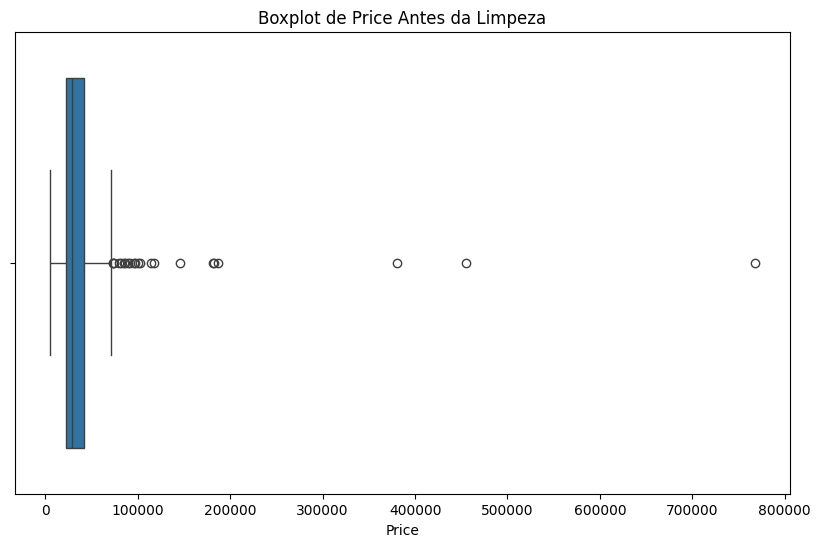

In [18]:
# Visualizar distribuição antes da limpeza
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de Price Antes da Limpeza')
plt.xlabel('Price')
plt.show()

In [19]:
# Remover os outliers em um novo DataFrame
df_clean = df.copy()

# Usar loc para filtrar e remover linhas
df_clean = df_clean.loc[df_clean['price'] <= 71395.0]
df_clean = df_clean.loc[df_clean['price'] != 0.0]
df_clean = df_clean.loc[df_clean['minimum_nights'] <= 6]

# Verificar estatísticas descritivas depois da limpeza
print("Estatísticas depois da limpeza:")
print(df_clean['price'].describe())

Estatísticas depois da limpeza:
count      310.000000
mean     31624.625806
std      12794.587847
min       5000.000000
25%      22763.000000
50%      28162.500000
75%      39153.000000
max      71000.000000
Name: price, dtype: float64


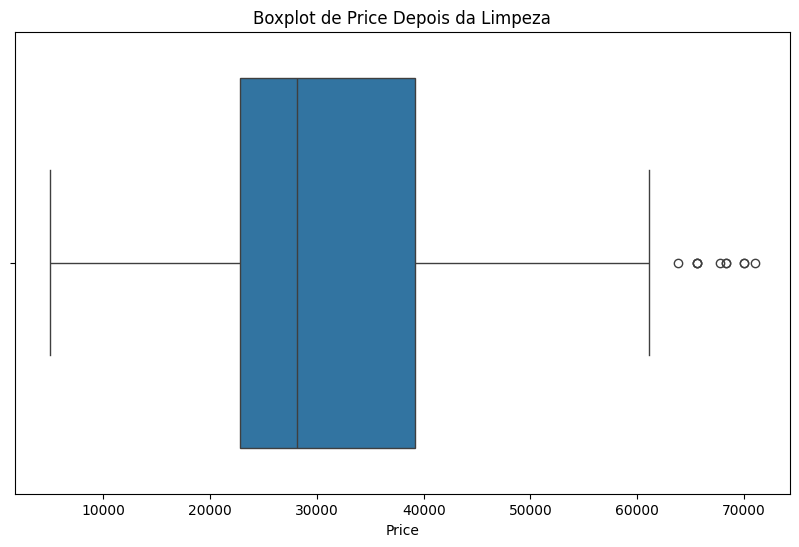

Shape antes da limpeza:  (359, 17)
Shape depois da limpeza:  (310, 17)


In [20]:
# Visualizar distribuição depois da limpeza
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['price'])
plt.title('Boxplot de Price Depois da Limpeza')
plt.xlabel('Price')
plt.show()

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)

#### **Histogramas sem *outliers***

Com o Dataset limpo, esse é o histograma sem a presença dos outliers.

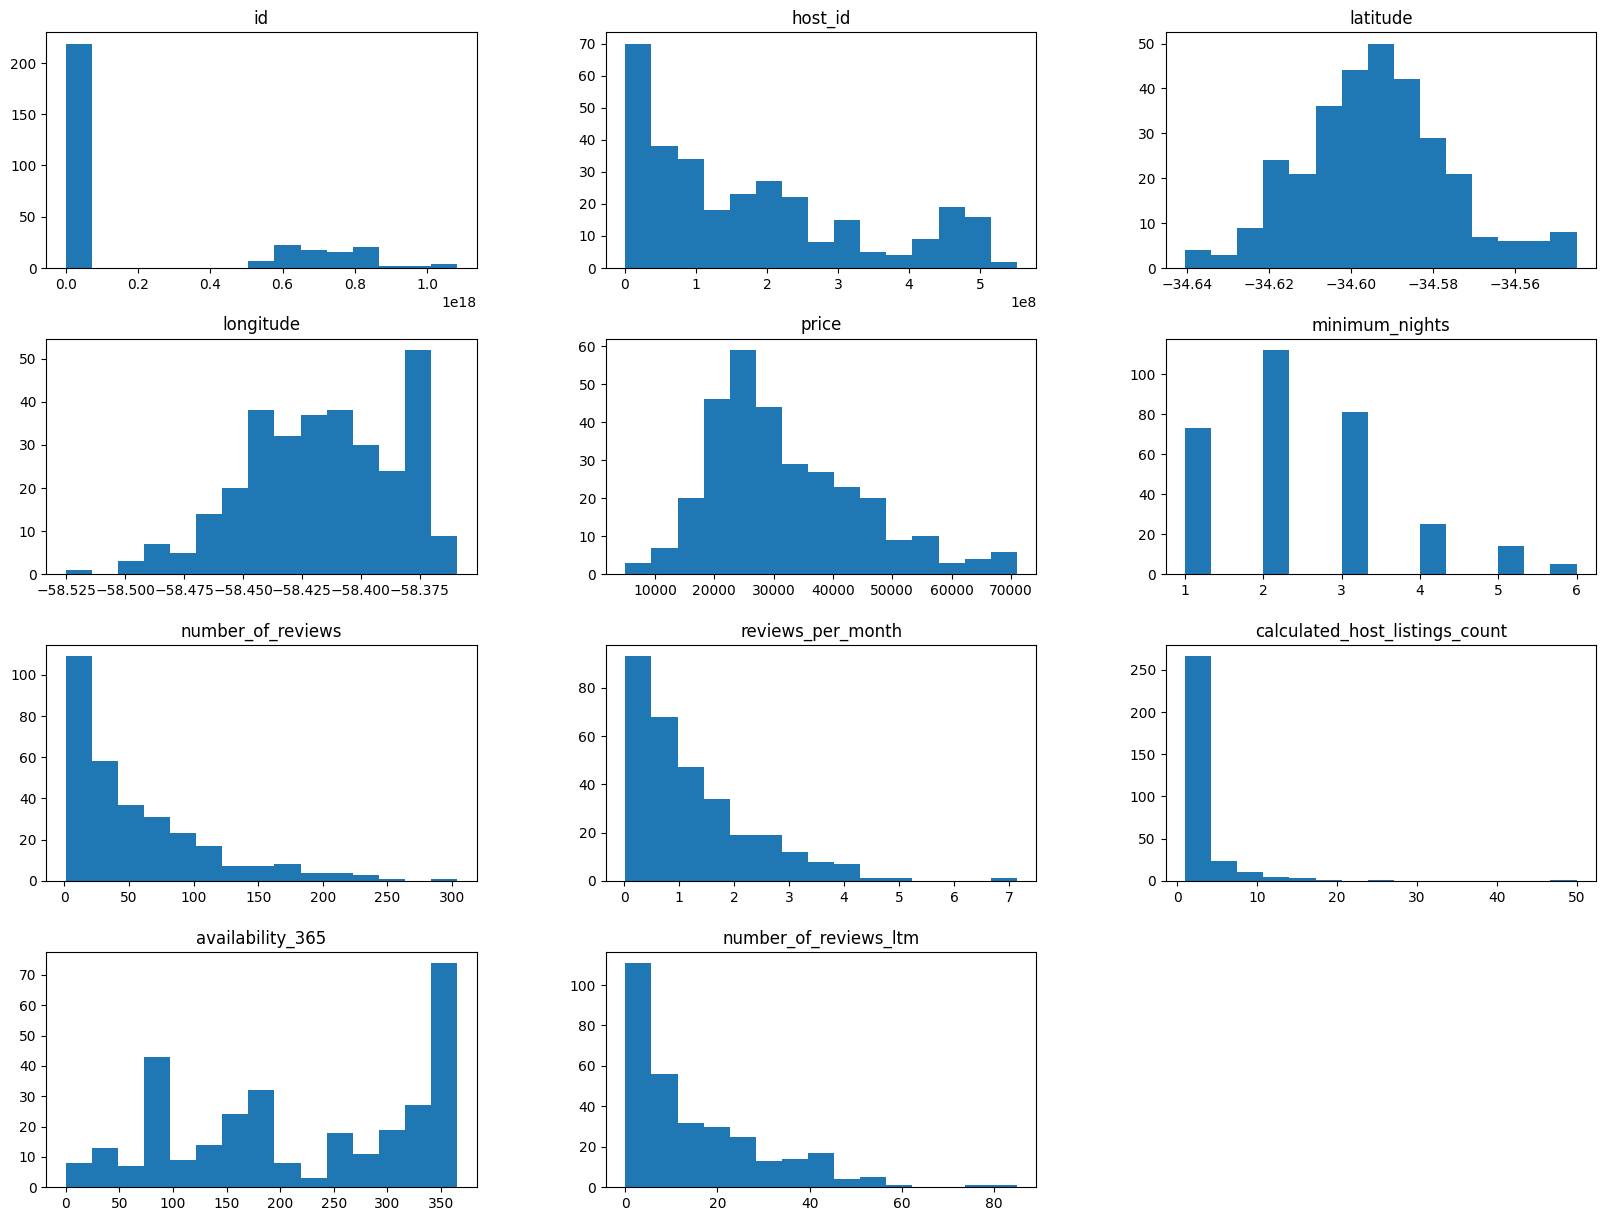

In [21]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,15), grid=False);

In [22]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.100000e+02,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0,310.0
mean,2.134423e+17,177637065.1,-34.6,-58.4,31624.6,2.4,55.6,1.2,2.7,220.1,14.8
std,3.386688e+17,155530563.7,0.0,0.0,12794.6,1.2,55.4,1.1,4.0,114.3,15.2
min,1.763180e+05,558310.0,-34.6,-58.5,5000.0,1.0,1.0,0.0,1.0,0.0,0.0
25%,2.735603e+07,45920404.0,-34.6,-58.4,22763.0,2.0,15.0,0.4,1.0,111.8,2.0
50%,3.998511e+07,139318597.5,-34.6,-58.4,28162.5,2.0,35.5,0.9,1.0,216.5,10.0
75%,6.013727e+17,258390715.2,-34.6,-58.4,39153.0,3.0,78.8,1.7,3.0,337.0,23.8
max,1.082643e+18,551473583.0,-34.5,-58.4,71000.0,6.0,304.0,7.1,50.0,365.0,85.0


### **Qual a média dos preços de aluguel?**

Em uma análise onde temos o valor do aluguel, se torna interessante saber a média desse valor. De modo a tirar *insights* que auxiliam no cálculo do gasto com a acomodação, em uma possível viagem.

* Foi possível verificar que o valor *médio* do aluguel das acomodações é **`31624.60 Pesos Argentinos`**.

In [23]:
# Ver a média da coluna `price` e arredondar para 2 casas decimais
media_price = round(df_clean['price'].mean(), 2)
print(media_price)

31624.63


### **Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No contexto da análise, podemos buscar relação ou semelhança entre duas variáveis.

Essas relações podem ser medidas, e é função do coeficiente de relação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse.


In [24]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.079394,0.055962,-0.023212,0.105110,0.047151
minimum_nights,0.079394,1.000000,-0.111101,-0.203898,-0.040034,-0.116970
number_of_reviews,0.055962,-0.111101,1.000000,0.654919,0.105246,-0.076362
reviews_per_month,-0.023212,-0.203898,0.654919,1.000000,0.087540,-0.070954
calculated_host_listings_count,0.105110,-0.040034,0.105246,0.087540,1.000000,0.076061
availability_365,0.047151,-0.116970,-0.076362,-0.070954,0.076061,1.000000


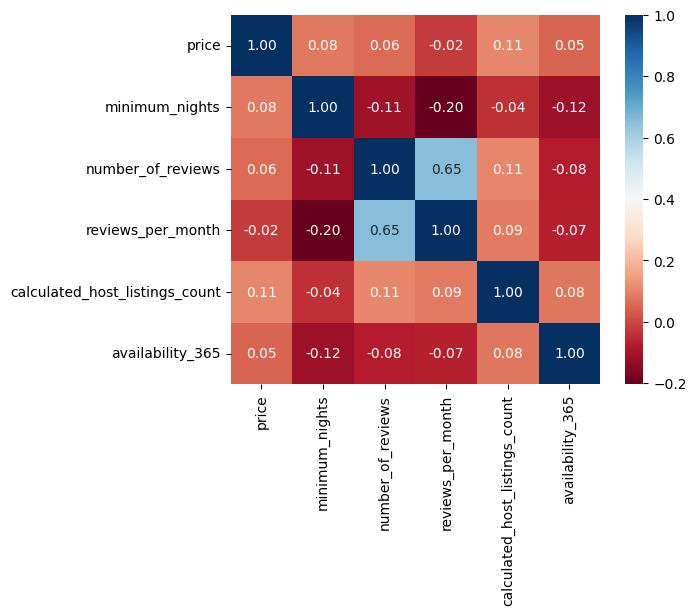

In [25]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu' , fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type` indica qual categoria de imóvel está anunciado na plataforma. No site, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado ou até mesmo dividir o mesmo quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [26]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    279
Private room        29
Shared room          2
Name: count, dtype: int64

Os tipos de Imóveis que mais aparece são, em ordem:
* Casa/Apt inteiros
* Quartos privados
* Quartos compartilhados


In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

room_type
Entire home/apt    0.777159
Private room       0.080780
Shared room        0.005571
Name: count, dtype: float64

Os imóveis tem uma distribuição bem interessante, veja:
* `Casas/apts inteiros` ocupam cerca de 78% dos imóveis anunciados
* `Quartos privados` ocupam 8% dos anúncios
* E menos de 1% são `Quartos compartilhados`

### **Qual a localidade mais cara de Buenos Aires?**

É possível verificar uma variável em função de outra, usando `groupby()`. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço do aluguel.

In [28]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero       63433.333333
Villa Devoto        54632.000000
Villa Urquiza       45706.833333
Flores              40891.500000
Colegiales          38583.500000
San Cristobal       35775.000000
Villa Del Parque    34600.000000
San Telmo           33926.272727
Palermo             33660.973684
Recoleta            32943.846154
Name: price, dtype: float64

Acima podemos notar que os valores médios de **Puerto Madero** e **Villa Devoto** são bem próximos, diferente de **Palermo** e **Recoleta** que apresentam valores mais baixos. 

Notamos que `Puerto Madero` é uma região com os imóveis mais caros de Buenos Aires, por e por outro lado temos `Palermo` e `Recoleta` com os imóveis mais baratos. 

In [29]:
# Definindo variáveis para ver a quantidade de imóveis de cada região
pm = df_clean[df_clean.neighbourhood == 'Puerto Madero'].shape[0]
vd = df_clean[df_clean.neighbourhood == 'Villa Devoto'].shape[0]
vu = df_clean[df_clean.neighbourhood == 'Villa Urquiza'].shape[0]
sjf = df_clean[df_clean.neighbourhood == 'Flores'].shape[0]
cl = df_clean[df_clean.neighbourhood == 'Colegiales'].shape[0]
sc = df_clean[df_clean.neighbourhood == 'San Cristobal'].shape[0]
vdp = df_clean[df_clean.neighbourhood == 'Villa Del Parque'].shape[0]
st = df_clean[df_clean.neighbourhood == 'San Telmo'].shape[0]
pl = df_clean[df_clean.neighbourhood == 'Palermo'].shape[0]
rc = df_clean[df_clean.neighbourhood == 'Recoleta'].shape[0]

# Calculando a soma do número de imóveis
total_imoveis = pm + vd + vu + sjf + cl + sc + vdp + st + pl + rc

# Imprimindo o número de imóveis em cada região de Buenos Aires
print(f'O número de imóveis em Puerto Madero é   : {pm:>5}')
print(f'O número de imóveis em Villa Devoto é    : {vd:>5}')
print(f'O número de imóveis em Villa Urquiza é   : {vu:>5}')
print(f'O número de imóveis em Flores é          : {sjf:>5}')
print(f'O número de imóveis em Colegiales é      : {cl:>5}')
print(f'O número de imóveis em San Cristobal é   : {sc:>5}')
print(f'O número de imóveis em Villa Del Parque é: {vdp:>5}')
print(f'O número de imóveis em San Telmo é       : {st:>5}')
print(f'O número de imóveis em Palermo é         : {pl:>5}')
print(f'O número de imóveis em Recoleta é        : {rc:>5}')
print(f'Total de imóveis                         : {total_imoveis:>5}')


O número de imóveis em Puerto Madero é   :     3
O número de imóveis em Villa Devoto é    :     1
O número de imóveis em Villa Urquiza é   :     6
O número de imóveis em Flores é          :     4
O número de imóveis em Colegiales é      :     8
O número de imóveis em San Cristobal é   :     1
O número de imóveis em Villa Del Parque é:     1
O número de imóveis em San Telmo é       :    11
O número de imóveis em Palermo é         :    76
O número de imóveis em Recoleta é        :    39
Total de imóveis                         :   150


Com isso conseguimos tirar algumas conclusões:

* `Puerto Madero` tem a maior média de Preço e a menor oferta de imóveis. 
* `Palermo` e `Recoleta` são os que possuem menor média de preço e a maior oferta de imóveis.

Os 3 bairros são considerados turísticos, com facilidades para locomoção, diversidade de pontos turistícos, praças, restaurantes e vida noturna ativa.

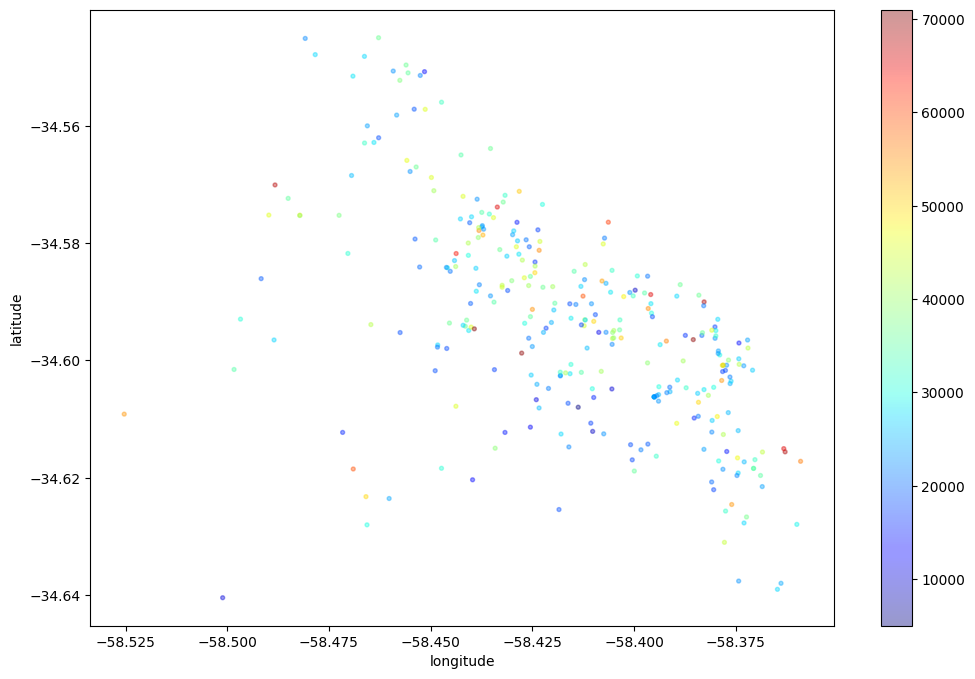

In [38]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos ver que a média do mínimo de noites é 2 noites, isso nos mostra que os proprietários tendem a disponibilizar os imóveis por no mínimo 2 noites (fins de semana)

In [31]:
# Ver a média da coluna `minimum_nights` e arredondar para 2 casas decimais
media_minimum_nights = round(df_clean['minimum_nights'].mean(), 2)
print(media_minimum_nights)

2.39


## Conclusões

Neste projeto, conseguimos tirar algumas informações sobre o **Airbnb** na cidade de Bueno Aires.

Se considerarmos a renda da classe média de Buenos Aires, que é a mais alta do país, ela tem uma renda média (ano de 2023) de 400.000 pesos argentinos, isso mostra que a hospedagem em Buenos Aires é relativamente cara. Pois, a média de preço é de `31625` pesos argentinos, sendo cerca de 8% do salário da classe média.

Algumas outras informações:

* A inflação na argentina é alta, o que faz com que os dados tenham um baixo grau de confiança.
* Cerca de 77% dos anúncios são  de `Casas ou apartamento`
* A média de preços mais cara é a de `Puerto Madero`.
* O local com a menor quantidade de imóveis anunciados é `Palermo` com quase 50% das ofertas de imóveis.
* A média de `minimum_nights` é cerca de 2 noites.